<a href="https://colab.research.google.com/github/Gokul867/Face_Sentiment_Analysis/blob/main/Face_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle


In [3]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gokul890","key":"0b684f6fa114befe61080b89e9142858"}'}

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
!kaggle datasets download -d abhinowww/face-sentiment-data

 99% 348M/350M [00:17<00:00, 26.5MB/s]
100% 350M/350M [00:17<00:00, 20.8MB/s]


In [6]:
import zipfile


# Unzip the downloaded file
zip_ref = zipfile.ZipFile("face-sentiment-data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [7]:
!ls testing_demo

Agony  Happy  Neutral  Sad  Scared


In [8]:
!ls testing_demo/Agony

1000.jpg  2003.jpg  3006.jpg  4009.jpg	5029.jpg  6031.jpg  7034.jpg  8082.jpg
1001.jpg  2004.jpg  3007.jpg  400.jpg	502.jpg   6032.jpg  7035.jpg  8083.jpg
1002.jpg  2005.jpg  3008.jpg  4010.jpg	5030.jpg  6033.jpg  7036.jpg  8084.jpg
1003.jpg  2006.jpg  3009.jpg  4011.jpg	5031.jpg  6034.jpg  7037.jpg  8085.jpg
1004.jpg  2007.jpg  300.jpg   4012.jpg	5032.jpg  6035.jpg  7038.jpg  8086.jpg
1005.jpg  2008.jpg  3010.jpg  4013.jpg	5033.jpg  6036.jpg  7039.jpg  8087.jpg
1006.jpg  2009.jpg  3011.jpg  4014.jpg	5034.jpg  6037.jpg  703.jpg   8088.jpg
1007.jpg  200.jpg   3012.jpg  4015.jpg	5035.jpg  6038.jpg  7040.jpg  8089.jpg
1008.jpg  2010.jpg  3013.jpg  4016.jpg	5036.jpg  6039.jpg  7041.jpg  808.jpg
1009.jpg  2011.jpg  3014.jpg  4017.jpg	5037.jpg  603.jpg   7042.jpg  8090.jpg
100.jpg   2012.jpg  3015.jpg  4018.jpg	5038.jpg  6040.jpg  7043.jpg  8091.jpg
1010.jpg  2013.jpg  3016.jpg  4019.jpg	5039.jpg  6041.jpg  7044.jpg  8092.jpg
1011.jpg  2014.jpg  3017.jpg  401.jpg	503.jpg   6042.jpg  7045.jpg

In [9]:
classes = ['Agony','Happy','Neutral','Sad','Scared']

In [10]:
image_directory = 'testing_demo'

In [11]:
!pip install split-folders

In [12]:

import splitfolders # or import splitfolders
input_folder = "testing_demo"
output = "testing_demo" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Copying files: 45128 files [00:07, 5942.02 files/s]


In [13]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("testing_demo/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Agony' 'Happy' 'Neutral' 'Sad' 'Scared']


In [14]:
import os

# Walk through testing_demo directory and list number of files
for dirpath, dirnames, filenames in os.walk("testing_demo"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 8 directories and 0 images in 'testing_demo'.
There are 5 directories and 0 images in 'testing_demo/val'.
There are 0 directories and 900 images in 'testing_demo/val/Neutral'.
There are 0 directories and 921 images in 'testing_demo/val/Scared'.
There are 0 directories and 891 images in 'testing_demo/val/Agony'.
There are 0 directories and 900 images in 'testing_demo/val/Happy'.
There are 0 directories and 900 images in 'testing_demo/val/Sad'.
There are 0 directories and 9000 images in 'testing_demo/Neutral'.
There are 0 directories and 9216 images in 'testing_demo/Scared'.
There are 0 directories and 8912 images in 'testing_demo/Agony'.
There are 0 directories and 9000 images in 'testing_demo/Happy'.
There are 0 directories and 9000 images in 'testing_demo/Sad'.
There are 5 directories and 0 images in 'testing_demo/test'.
There are 0 directories and 900 images in 'testing_demo/test/Neutral'.
There are 0 directories and 923 images in 'testing_demo/test/Scared'.
There are 0 dir

In [15]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [16]:
train_dir = "testing_demo/train/"
test_dir = "testing_demo/test/"
val_dir = "testing_demo/val"

In [17]:
import tensorflow

Image shape: (240, 240, 3)


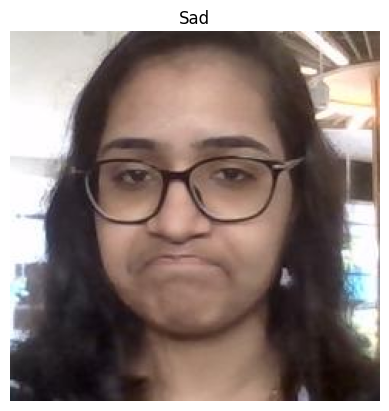

In [18]:

# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

val_data = train_datagen.flow_from_directory(val_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 36101 images belonging to 5 classes.
Found 4512 images belonging to 5 classes.


In [20]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  shuffle = True,
                                                                  class_mode='categorical')

Found 36101 images belonging to 5 classes.


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(5, activation='softmax') # changed to have 5 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data_augmented, # 5 classes
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=val_data,
                        validation_steps=len(val_data))

In [ ]:
# Evaluate on the test data
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 4515 images belonging to 5 classes.


In [ ]:
model_9.evaluate(test_data)

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model=model_9,
              filename="sad.jpeg",
              class_names=class_names)

Found 36101 images belonging to 5 classes.


In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=val_data,
                          validation_steps=len(val_data))

Epoch 1/5
1129/1129 [==============================] - 474s 418ms/step - loss: 1.4093 - accuracy: 0.3823 - val_loss: 0.9922 - val_accuracy: 0.6379
Epoch 2/5
1129/1129 [==============================] - 454s 402ms/step - loss: 1.0806 - accuracy: 0.5662 - val_loss: 0.7262 - val_accuracy: 0.7086
Epoch 3/5
1129/1129 [==============================] - 451s 399ms/step - loss: 0.8535 - accuracy: 0.6633 - val_loss: 0.5187 - val_accuracy: 0.7901
Epoch 4/5
1129/1129 [==============================] - 451s 400ms/step - loss: 0.6857 - accuracy: 0.7376 - val_loss: 0.3552 - val_accuracy: 0.8949
Epoch 5/5
1129/1129 [==============================] - 446s 395ms/step - loss: 0.5355 - accuracy: 0.8012 - val_loss: 0.2723 - val_accuracy: 0.9162


In [ ]:
model_11.evaluate(test_data)

142/142 [==============================] - 7s 51ms/step - loss: 0.2861 - accuracy: 0.9090


[0.28614866733551025, 0.9089701175689697]

1/1 [==============================] - 0s 21ms/step


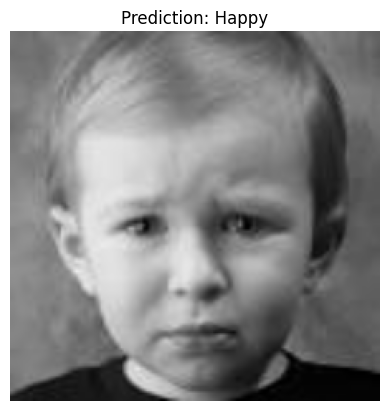

In [ ]:
pred_and_plot(model=model_11,
              filename="sad.jpeg",
              class_names=class_names)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32


In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
def create_model(model_url, num_classes=5):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
# Create model
resnet_model = create_model(resnet_url)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=val_data,
                                  validation_steps=len(val_data)
                                  ) # name of log files

Epoch 1/5
1129/1129 [==============================] - 557s 487ms/step - loss: 0.4415 - accuracy: 0.8642 - val_loss: 0.1951 - val_accuracy: 0.9413
Epoch 2/5
1129/1129 [==============================] - 520s 460ms/step - loss: 0.1769 - accuracy: 0.9533 - val_loss: 0.1425 - val_accuracy: 0.9402
Epoch 3/5
1129/1129 [==============================] - 534s 473ms/step - loss: 0.1272 - accuracy: 0.9665 - val_loss: 0.0914 - val_accuracy: 0.9683
Epoch 4/5
1129/1129 [==============================] - 533s 472ms/step - loss: 0.1026 - accuracy: 0.9720 - val_loss: 0.0705 - val_accuracy: 0.9807
Epoch 5/5
1129/1129 [==============================] - 533s 472ms/step - loss: 0.0870 - accuracy: 0.9751 - val_loss: 0.0706 - val_accuracy: 0.9761


In [ ]:
# Resnet summary
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                                 
Total params: 23575045 (89.93 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_model.evaluate(test_data)

142/142 [==============================] - 13s 92ms/step - loss: 0.0773 - accuracy: 0.9710


[0.07729306071996689, 0.9709855914115906]

1/1 [==============================] - 0s 25ms/step


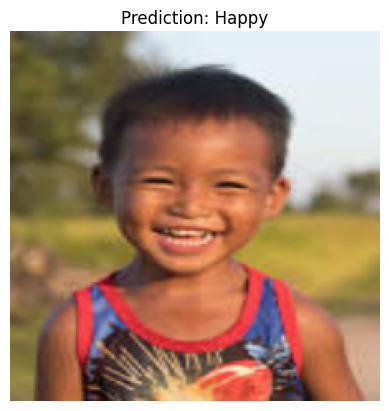

In [ ]:
pred_and_plot(model=resnet_model,
              filename="laugh.jpeg",
              class_names=classes)

In [ ]:
# Save a model
resnet_model.save("rm/resnet_model")

In [ ]:
# Save a model using the HDF5 format
resnet_model.save("rm/resnet_model1.h5") # note the addition of '.h5' on the end

In [ ]:
resnet_model.save("rm/resnet_model2.keras")

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Suc

In [ ]:
!zip -r /content/rm.zip /content/rm

  adding: content/rm/ (stored 0%)
  adding: content/rm/resnet_model2.keras (deflated 7%)
  adding: content/rm/resnet_model1.h5 (deflated 7%)
  adding: content/rm/resnet_model/ (stored 0%)
  adding: content/rm/resnet_model/keras_metadata.pb (deflated 81%)
  adding: content/rm/resnet_model/variables/ (stored 0%)
  adding: content/rm/resnet_model/variables/variables.index (deflated 80%)
  adding: content/rm/resnet_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/rm/resnet_model/assets/ (stored 0%)
  adding: content/rm/resnet_model/saved_model.pb (deflated 92%)
  adding: content/rm/resnet_model/fingerprint.pb (stored 0%)


In [ ]:
import tensorflowjs as tfjs

In [ ]:
!pip install tensorrt

  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1-py2.py3-none-any.whl size=16972 sha256=a2943d0da084a5bf3f916c88cf4524957eb1462848750b7a019a93715f273da9
  Stored in directory: /root/.cache/pip/wheels/6d/29/56/abdffd4c604f255b5254bef3f1c598ab7811ea020540599438
Successfully built tensorrt


In [ ]:
! tensorflowjs_converter --input_format=keras /rm/resnet_model1.h5 /rm/tfjs_model

2023-08-08 08:52:31.402280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 958, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 962, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 948, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 618, in _dispatch_converter
    dispatch_keras_h5_to_tfjs_layers_model_conversion(
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 77, in di

In [ ]:
import tensorflow as tf

In [ ]:
loaded_saved_model = tf.keras.models.load_model("rm/resnet_model")

In [ ]:
tfjs.converters.save_keras_model(loaded_saved_model, "rm/tfjs_model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!zip -r /content/Js_model.zip /content/Js_model

  adding: content/Js_model/ (stored 0%)
  adding: content/Js_model/tfjs_model/ (stored 0%)
  adding: content/Js_model/tfjs_model/group1-shard12of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/model.json (deflated 93%)
  adding: content/Js_model/tfjs_model/group1-shard7of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard1of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard13of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard3of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard4of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard19of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard15of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard18of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard14of23.bin (deflated 7%)
  adding: content/Js_model/tfjs_model/group1-shard6of23.bin (deflated 7%)
  adding: content/Js_mode

In [ ]:
! tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_node_names='Resnet/Predictions/Reshape_1' \
    --saved_model_tags=serve \
    /rm/resnet_model \
    /rm/web_model

2023-08-08 09:26:17.937839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 958, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 962, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 948, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 654, in _dispatch_converter
    tf_saved_model_conversion_v2.convert_tf_saved_model(
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/tf_saved_model_conversion_v

In [ ]:
tfjs.converters.convert_tf_saved_model(loaded_saved_model,"rm/web_model")

In [ ]:
tfjs.converters.save_keras_model(resnet_model,"resnet_modelJs")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
